# Learn Scikit-Learn

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Analyzing data

In [39]:
df = pd.read_csv('./TextFiles/smsspamcollection.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [45]:
np.shape(df)

(5572, 4)

In [46]:
df.isnull()

,label,message,length,punct
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
5567,False,False,False,False
5568,False,False,False,False
5569,False,False,False,False
5570,False,False,False,False


In [47]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [49]:
df.label.unique()

array(['ham', 'spam'], dtype=object)

In [50]:
df.label.value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

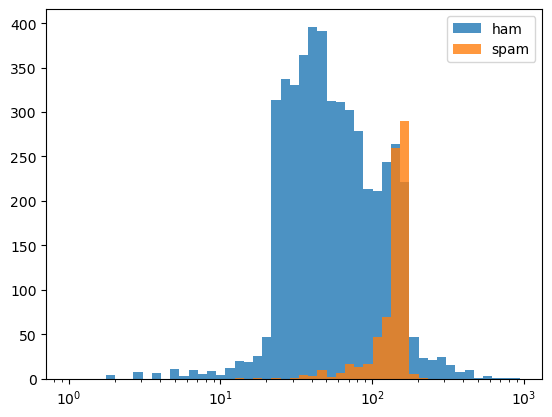

In [80]:
%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0, 50))
plt.hist(df[df.label == 'ham'].length, bins=bins, alpha=0.8)
plt.hist(df[df.label == 'spam'].length, bins=bins, alpha=0.8)
plt.legend(('ham', 'spam'))
plt.show()

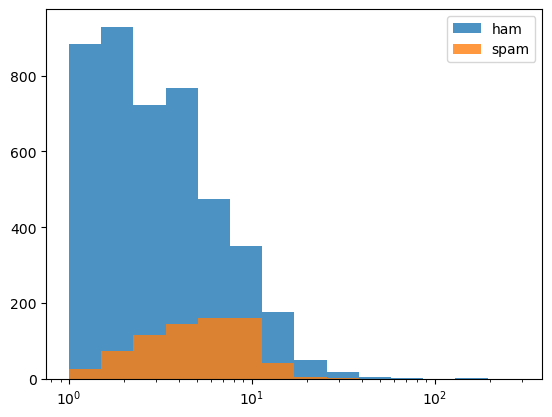

In [99]:
%matplotlib inline

plt.xscale('log')
bins = 1.5**(np.arange(0, 15))
plt.hist(df[df.label == 'ham'].punct, bins=bins, alpha=0.8)
plt.hist(df[df.label == 'spam'].punct, bins=bins, alpha=0.8)
plt.legend(('ham', 'spam'))
plt.show()

## Training models without textual data

In [102]:
X = df[['length', 'punct']]
y = df.label

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

In [112]:
from sklearn.linear_model import LogisticRegression

In [113]:
lr_model = LogisticRegression()

In [114]:
lr_model.fit(X_train, y_train)

LogisticRegression()

In [121]:
predictions = lr_model.predict(X_test)

In [126]:
metrics_df = pd.DataFrame(metrics.confusion_matrix(y_test, predictions), index=['ham','spam'], columns=['ham','spam'])
metrics_df

,ham,spam
ham,1414,23
spam,233,2


In [128]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.86      0.98      0.92      1437
        spam       0.08      0.01      0.02       235

    accuracy                           0.85      1672
   macro avg       0.47      0.50      0.47      1672
weighted avg       0.75      0.85      0.79      1672



In [129]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

nb_model.fit(X_train, y_train)

predictions = nb_model.predict(X_test)

print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.86      0.99      0.92      1437
        spam       0.35      0.03      0.05       235

    accuracy                           0.86      1672
   macro avg       0.61      0.51      0.48      1672
weighted avg       0.79      0.86      0.80      1672



In [131]:
from sklearn.svm import SVC

svc_model = SVC()

svc_model.fit(X_train, y_train)

predictions = svc_model.predict(X_test)

print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.88      0.99      0.93      1437
        spam       0.66      0.15      0.24       235

    accuracy                           0.87      1672
   macro avg       0.77      0.57      0.59      1672
weighted avg       0.85      0.87      0.83      1672



## Text feature extraction

In [132]:
X = df.message
y = df.label

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=23)

In [148]:
# from sklearn.feature_extraction.text import CountVectorizer

In [149]:
# count_vect = CountVectorizer()

#### Fir vectorizer to the data
- build a vocab;
- count the number of words;

#### Transform text to vector

In [150]:
# count_vect.fit(X_train)
# X_train_counts = count_vect.transform(X_train)

# same as
# X_train_counts = count_vect.fit_transform(X_train)

In [151]:
# from sklearn.feature_extraction.text import TfidfTransformer

In [152]:
# tfidf_trans = TfidfTransformer()

In [153]:
# X_train_tfidf = tfidf_trans.fit_transform(X_train_counts)

#### Combine Count + TfIdf

In [169]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [162]:
# tfidf_vectorizer = TfidfVectorizer()

In [164]:
# X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

In [170]:
from sklearn.svm import LinearSVC

In [166]:
# clf = LinearSVC()

In [167]:
# clf.fit(X_train_tfidf, y_train)

#### Combine Text Vectorization and Model Training

In [168]:
from sklearn.pipeline import Pipeline

In [171]:
text_clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [172]:
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [173]:
predictions = text_clf.predict(X_test)

In [174]:
metrics.confusion_matrix(y_test, predictions)

array([[1435,    2],
       [  18,  217]])

In [175]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1437
        spam       0.99      0.92      0.96       235

    accuracy                           0.99      1672
   macro avg       0.99      0.96      0.97      1672
weighted avg       0.99      0.99      0.99      1672

